In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [4]:
data = pd.read_excel("/content/Online Retail.xlsx", sheet_name ='Online Retail')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preprocessing

In [5]:
data['UnitPrice'] = data['UnitPrice'].replace(0, np.nan)

#Missing values in the "UnitPrice" column replaced based on the values within the same "StockCode" group
data['UnitPrice'] = data.groupby('StockCode')['UnitPrice'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

data['UnitPrice'] = data['UnitPrice'].replace(np.nan, 0)

In [6]:
#Missing values in the "Description" column replaced based on the values within the same "StockCode" group
data['Description'] = data.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

Data Segmentation

In [7]:
dataset1 = data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False))] #Anomaly Data
dataset2 = data[~data['InvoiceNo'].isin(dataset1['InvoiceNo'])] #Filtered Dataset

In [8]:
dataset2['UnitPrice'] = dataset2['UnitPrice'].replace(0, np.nan)
dataset2.dropna(subset=["UnitPrice"], inplace = True)

<ipython-input-8-0495392ad56c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['UnitPrice'] = dataset2['UnitPrice'].replace(0, np.nan)
<ipython-input-8-0495392ad56c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.dropna(subset=["UnitPrice"], inplace = True)


Replacing null values of CustomerID

In [9]:
invoices_with_empty_customer_id = dataset2[dataset2['CustomerID'].isna()]['InvoiceNo'].unique()

#counting distinct invoice numbers having null customerID for replacing Null CustomerId with value
len(invoices_with_empty_customer_id)

2356

In [10]:
new_customer_id = "RE0001"
customer_count = 1
invoice_customer_mapping = {}
for invoice_no in invoices_with_empty_customer_id:
  if(invoice_no not in invoice_customer_mapping):
    dataset2.loc[dataset2['InvoiceNo'] == invoice_no, 'CustomerID'] = new_customer_id
    invoice_customer_mapping[invoice_no] = new_customer_id
    customer_count += 1
    new_customer_id = "RE" + str(customer_count).rjust(4,"0")
  else:
    dataset2.loc[dataset2['InvoiceNo'] == invoice_no, 'CustomerID'] = invoice_customer_mapping[invoice_no]

In [11]:
dataset2['TotalPrice'] = dataset2['Quantity'] * dataset2['UnitPrice']
dataset2.isnull().sum()

<ipython-input-11-cc3c95fcb8da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['TotalPrice'] = dataset2['Quantity'] * dataset2['UnitPrice']


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [12]:
dataset2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [13]:
dataset2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
dtype: object

In [14]:
dataset_2_1 = dataset2[~(dataset2['CustomerID'].str.lower().str.startswith('re', na=False))]
dataset_2_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# Dataset 2.1 Analysis

## *1. **Descriptive** Analysis using Statistical analysis*

### 1.1 Finding High valued Customers

In [15]:
dataset_2_1['TotalPrice'] = dataset_2_1['Quantity'] * dataset_2_1['UnitPrice']

<ipython-input-15-d2d766de438a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2_1['TotalPrice'] = dataset_2_1['Quantity'] * dataset_2_1['UnitPrice']


In [16]:
total_spending_per_customer = dataset_2_1.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Define a threshold (e.g., top 10% of customers)
threshold_percentile = 90

# Calculate the threshold value
threshold_value = total_spending_per_customer['TotalPrice'].quantile(threshold_percentile / 100)

high_value_customers = total_spending_per_customer[total_spending_per_customer['TotalPrice'] > threshold_value]

In [17]:
high_value_customers.sort_values(by = 'TotalPrice', ascending=False)

,CustomerID,TotalPrice
1703,14646.0,280211.90
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,133271.52
55,12415.0,124649.69
...,...,...
3817,17528.0,3540.10
908,13552.0,3539.53
752,13334.0,3536.82
3551,17160.0,3518.03


These are top 10% high valued Customers according to their Total Spending

In [18]:
purchase_frequency = dataset_2_1.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

average_transaction_value = dataset_2_1.groupby('CustomerID')['TotalPrice'].mean().reset_index()

threshold_percentile = 90
threshold_value_frequency = purchase_frequency['InvoiceNo'].quantile(threshold_percentile / 100)

high_value_frequency = purchase_frequency[purchase_frequency['InvoiceNo'] > threshold_value_frequency]

threshold_value_avg_transaction = average_transaction_value['TotalPrice'].quantile(threshold_percentile / 100)

high_value_avg_transaction = average_transaction_value[average_transaction_value['TotalPrice'] > threshold_value_avg_transaction]

In [19]:
high_value_avg_transaction.sort_values(by = 'TotalPrice', ascending=False)

,CustomerID,TotalPrice
692,13256.0,10659.000000
2103,15195.0,3861.000000
603,13135.0,3096.000000
4045,17846.0,2033.100000
3096,16532.0,1687.200000
...,...,...
70,12432.0,46.845556
1934,14970.0,46.825294
2111,15206.0,46.700000
2542,15777.0,46.436818


These are top 10% high valued customers based on their average transaction value

In [20]:
high_value_frequency.sort_values(by = 'InvoiceNo', ascending=False)

,CustomerID,InvoiceNo
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
350,12779.0,12
1754,14713.0,12
4054,17858.0,12
1782,14755.0,12


These are top 10% high valued Customers based on their frequency of purchase

In [21]:
customers_total_spending = set(high_value_customers['CustomerID'])
customers_frequency = set(high_value_frequency['CustomerID'])
customers_avg_transaction = set(high_value_avg_transaction['CustomerID'])

common_high_value_customers = customers_total_spending.intersection(customers_frequency, customers_avg_transaction)

common_high_value_customers_df = pd.DataFrame({'CustomerID': list(common_high_value_customers)})

print(common_high_value_customers_df)

    CustomerID
0      12931.0
1      12678.0
2      13576.0
3      14088.0
4      13324.0
..         ...
64     14062.0
65     15482.0
66     17404.0
67     13694.0
68     12415.0

[69 rows x 1 columns]


***These are top 69 customers based on their total spending, frequency of purchase and average transaction value.***

### 1.2 Identifying frequently purchased together products

In [22]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
dataset_2_1['StockCode'] = dataset_2_1['StockCode'].astype(str)

# Transaction Data Formatting
transaction_data = dataset_2_1.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()

# Transaction Encoding
te = TransactionEncoder()
te_ary = te.fit(transaction_data['StockCode']).transform(transaction_data['StockCode'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-0358e1810c95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2_1['StockCode'] = dataset_2_1['StockCode'].astype(str)


In [24]:
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Filter rules based on desired metrics
interesting_rules = rules[(rules['support'] > 0.01) & (rules['confidence'] > 0.5) & (rules['lift'] > 1)]
pd.reset_option('display.max_rows')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
interesting_rules[['antecedents','consequents']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
0,(20712),(85099B)
3,(20719),(20724)
6,(20723),(20724)
12,(22355),(20724)
15,(22356),(20724)
...,...,...
636,"(22699, 22698)","(22423, 22697)"
637,"(22699, 22423)","(22697, 22698)"
639,"(22423, 22698)","(22699, 22697)"
640,"(22697, 22698)","(22699, 22423)"


In [28]:
interesting_rules1 = rules[(rules['support'] > 0.02) & (rules['confidence'] > 0.5) & (rules['lift'] > 1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
interesting_rules1[['antecedents','consequents']].shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(16, 2)

In [30]:
interesting_rules1['antecedents'] = interesting_rules1['antecedents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])
interesting_rules1['consequents'] = interesting_rules1['consequents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-c05a391fa230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_rules1['antecedents'] = interesting_rules1['antecedents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])
<ipython-input-30-c05a391fa230>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [31]:
interesting_rules1[['antecedents','consequents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
31,[LUNCH BAG PINK POLKADOT],[LUNCH BAG RED RETROSPOT]
136,[RED HANGING HEART T-LIGHT HOLDER],[WHITE HANGING HEART T-LIGHT HOLDER]
176,[PAPER CHAIN KIT VINTAGE CHRISTMAS],[PAPER CHAIN KIT 50'S CHRISTMAS ]
247,[JUMBO BAG PINK POLKADOT],[JUMBO BAG RED RETROSPOT]
298,[GREEN REGENCY TEACUP AND SAUCER],[PINK REGENCY TEACUP AND SAUCER]
299,[PINK REGENCY TEACUP AND SAUCER],[GREEN REGENCY TEACUP AND SAUCER]
300,[ROSES REGENCY TEACUP AND SAUCER ],[GREEN REGENCY TEACUP AND SAUCER]
301,[GREEN REGENCY TEACUP AND SAUCER],[ROSES REGENCY TEACUP AND SAUCER ]
302,[ROSES REGENCY TEACUP AND SAUCER ],[PINK REGENCY TEACUP AND SAUCER]
303,[PINK REGENCY TEACUP AND SAUCER],[ROSES REGENCY TEACUP AND SAUCER ]


In [32]:
interesting_rules['antecedents'] = interesting_rules['antecedents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])
interesting_rules['consequents'] = interesting_rules['consequents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-9394d4b98989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_rules['antecedents'] = interesting_rules['antecedents'].apply(lambda x: [dataset_2_1.loc[dataset_2_1['StockCode'] == item, 'Description'].values[0] for item in x])
<ipython-input-32-9394d4b98989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [33]:
interesting_rules[['antecedents','consequents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
0,[JUMBO BAG WOODLAND ANIMALS],[JUMBO BAG RED RETROSPOT]
3,[WOODLAND CHARLOTTE BAG],[RED RETROSPOT CHARLOTTE BAG]
6,[STRAWBERRY CHARLOTTE BAG],[RED RETROSPOT CHARLOTTE BAG]
12,[CHARLOTTE BAG SUKI DESIGN],[RED RETROSPOT CHARLOTTE BAG]
15,[CHARLOTTE BAG PINK POLKADOT],[RED RETROSPOT CHARLOTTE BAG]
...,...,...
636,"[ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...","[REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
637,"[ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...","[GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
639,"[REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...","[ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN..."
640,"[GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...","[ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK..."


## *2.  **Diagnostic** Analysis using Statistical Analysis and Vizualization*

### 2.1 Nature of Distribution of Features

**OUTLIER DETECTION USING IQR**

Since retail datasets can often have skewed distributions due to varying sales patterns, the IQR method can be effective to detect outliers.

In [37]:
dataset_2_1[dataset_2_1['UnitPrice']>1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
45622,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain,-1126.00
73446,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain,-1715.85
117052,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE,-1687.17
117053,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE,-1687.17
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,1252.95
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore,-2382.92


It shows records having stockCode value with length less than 5 are not related to purchased products. Hence I will create a dataset3 from dataset 2.1 which will have only those records having length of stock code less than 5.

In [114]:
dataset3 = dataset_2_1[~(dataset_2_1['StockCode'].apply(lambda x: len(str(x)) < 5))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


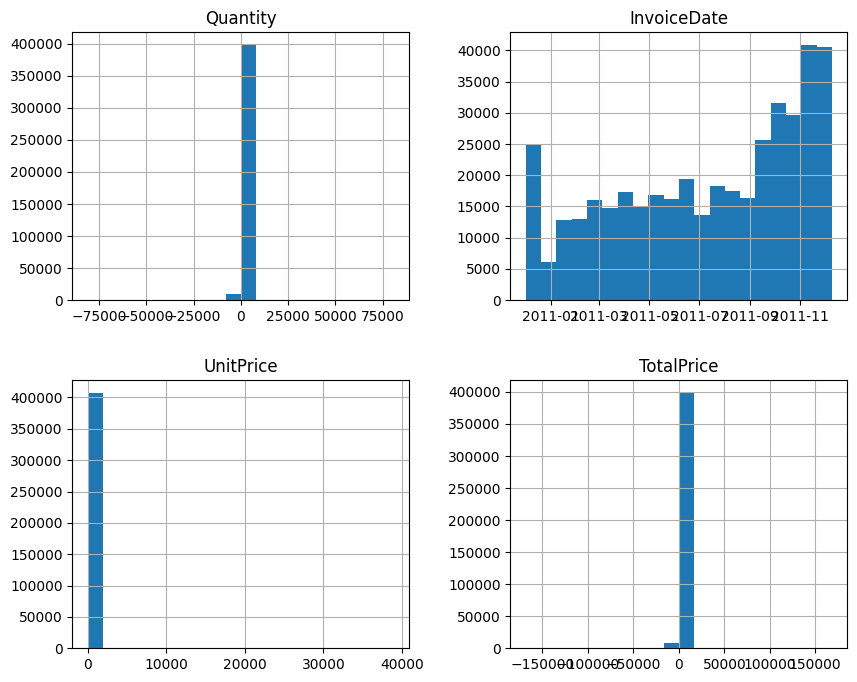

In [34]:
dataset_2_1.hist(figsize=(10, 8), bins=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


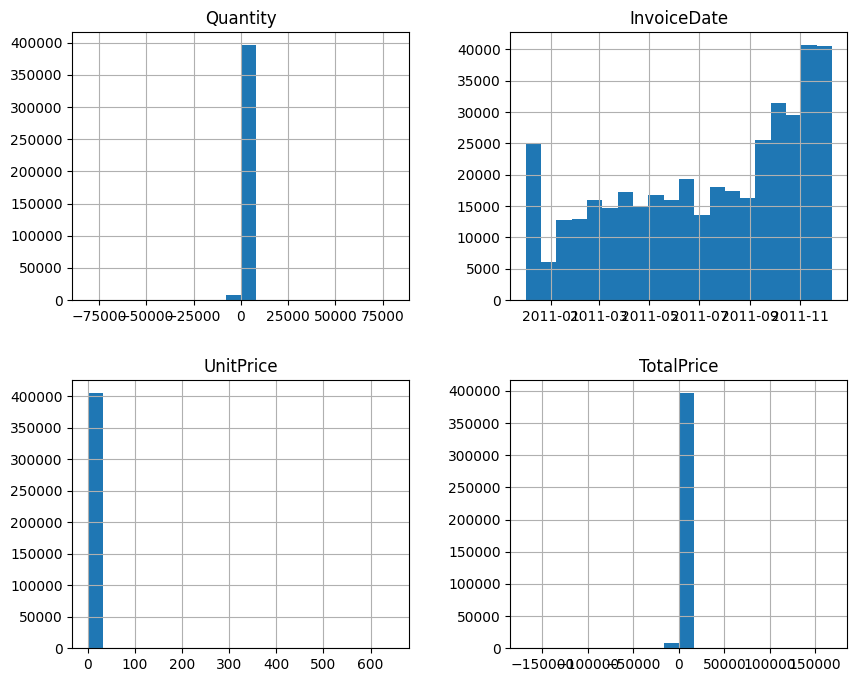

In [84]:
dataset3.hist(figsize=(10, 8), bins=20)
plt.show()

Exactly similar Histograms hence not too big difference between these two datasets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


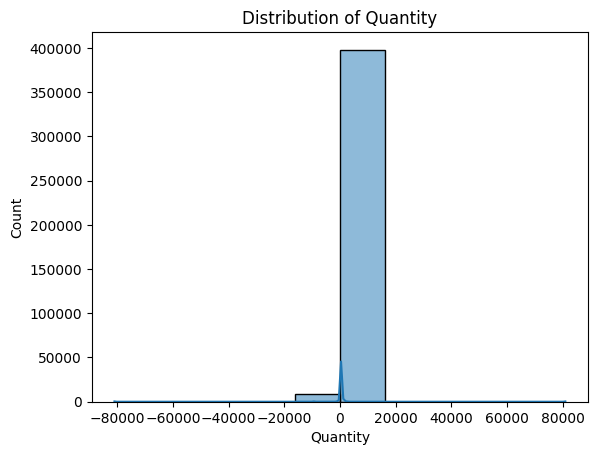

In [80]:
sns.histplot(dataset_2_1['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity')
plt.show()

In [35]:
dataset_2_1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,TotalPrice
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460896,20.435445
std,248.693370,69.315180,427.919297
min,-80995.000000,0.001000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [85]:
dataset3.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,TotalPrice
count,404921.000000,404921.00000,404921.000000
mean,12.105470,2.90180,20.498968
std,249.233858,4.43137,423.102589
min,-80995.000000,0.00100,-168469.600000
25%,2.000000,1.25000,4.200000
50%,5.000000,1.95000,10.900000
75%,12.000000,3.75000,19.500000
max,80995.000000,649.50000,168469.600000


For all three Quantity, UnitPrice, TotalPrice

Mean > Median --> *Positively skewed*

Hence Box Plot or Violin Plot will best for vizualising these.

***Standard Deviation Slightly decreased in dataset3 so I will prefer dataset3 for further analysis***


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Box Plot for Multiple Features')

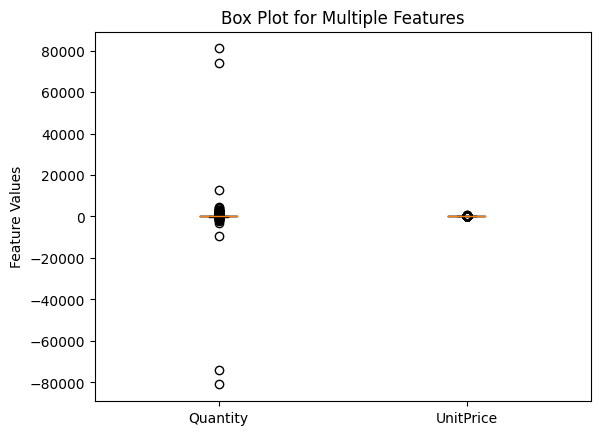

In [109]:
plt.boxplot([dataset3['Quantity'], dataset3['UnitPrice']], labels=['Quantity', 'UnitPrice'])

plt.ylabel('Feature Values')
plt.title('Box Plot for Multiple Features')

Too much outliers in this data hence need to be removed

In [115]:
quantity_q1 = dataset3['Quantity'].quantile(0.25)
quantity_q3 = dataset3['Quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1

quant_lower_range = quantity_q1 - 1.5 * quantity_iqr
quant_upper_range = quantity_q3 + 1.5 * quantity_iqr
print(quant_lower_range)
print(quant_upper_range)

price_q1 = dataset3['UnitPrice'].quantile(0.25)
price_q3 = dataset3['UnitPrice'].quantile(0.75)
price_iqr = price_q3 - price_q1

price_lower_range = price_q1 - 1.5 * price_iqr
price_upper_range = price_q3 + 1.5 * price_iqr
print(price_lower_range)
print(price_upper_range)


-13.0
27.0
-2.5
7.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
dataset3 = dataset3[(dataset3['UnitPrice']>price_lower_range) & (dataset3['UnitPrice']<=price_upper_range) & (dataset3['Quantity']>quant_lower_range) & (dataset3['Quantity']<=quant_upper_range)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Box Plot for Multiple Features')

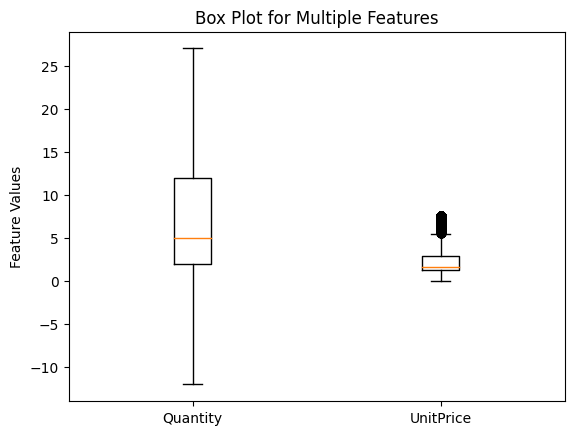

In [117]:
plt.boxplot([dataset3['Quantity'], dataset3['UnitPrice']], labels=['Quantity', 'UnitPrice'])

plt.ylabel('Feature Values')
plt.title('Box Plot for Multiple Features')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Box Plot for Multiple Features')

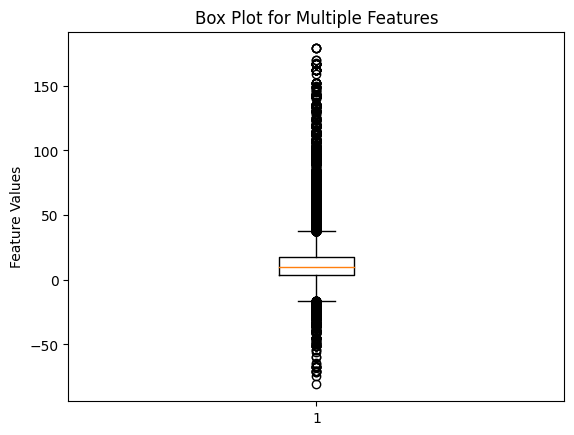

In [118]:
plt.boxplot(dataset3['TotalPrice'])

plt.ylabel('Feature Values')
plt.title('Box Plot for Multiple Features')

In [119]:
dataset3.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,TotalPrice
count,344087.000000,344087.000000,344087.000000
mean,7.285006,2.201578,12.410691
std,6.879364,1.548142,13.392528
min,-12.000000,0.001000,-81.000000
25%,2.000000,1.250000,3.750000
50%,5.000000,1.650000,9.960000
75%,12.000000,2.950000,17.250000
max,27.000000,7.500000,178.800000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


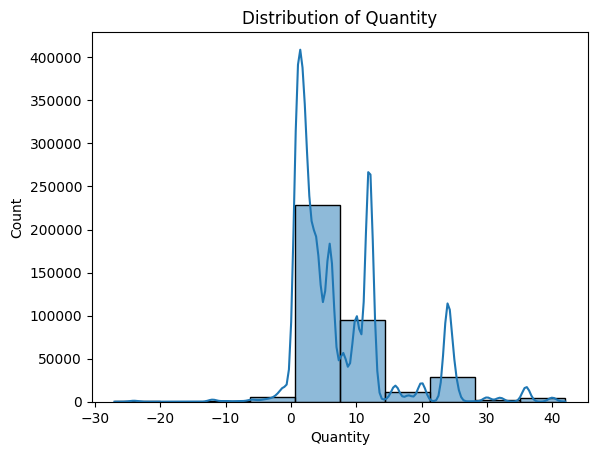

In [65]:
sns.histplot(dataset3['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity')
plt.show()

### 2.2 Bivariate Analysis

In [123]:
dataset4 = dataset_2_1[~(dataset_2_1['StockCode'].apply(lambda x: len(str(x)) < 5))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
# Using correlation Coefficient
correlation_matrix = dataset_2_1.corr()
print(correlation_matrix)

            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.001236    0.918487
UnitPrice  -0.001236   1.000000   -0.129200
TotalPrice  0.918487  -0.129200    1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-120-fd42c05bc8e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset_2_1.corr()


In [124]:
# Using correlation Coefficient
correlation_matrix = dataset4.corr()
print(correlation_matrix)

            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.013245    0.931223
UnitPrice  -0.013245   1.000000    0.045572
TotalPrice  0.931223   0.045572    1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-124-e255af6c3f1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset4.corr()


In [121]:
correlation_matrix = dataset3.corr()
print(correlation_matrix)

            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.340634    0.537839
UnitPrice  -0.340634   1.000000    0.330961
TotalPrice  0.537839   0.330961    1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-d87db8800934>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset3.corr()


UnitPrice and Quantity

***It shows that there is a perfect negative correlation, but it is more close to 0 as compare to -1 hence there is a slighlty weak relationship between these two.***



In [122]:
correlation_matrix = data.corr()
print(correlation_matrix)

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001251   -0.003600
UnitPrice  -0.001251   1.000000   -0.004563
CustomerID -0.003600  -0.004563    1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-122-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-125-d76fedc97eed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset3.corr()


<Axes: >

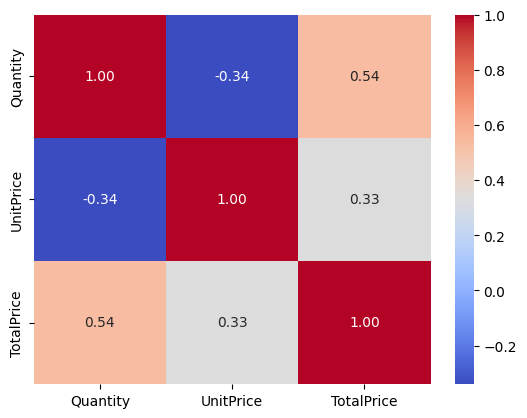

In [125]:
correlation_matrix = dataset3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

It shows a dark blue color which means there is a strong negative correlation between Quantity and UnitPrice Field

That is products having low prices are purchased in large quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


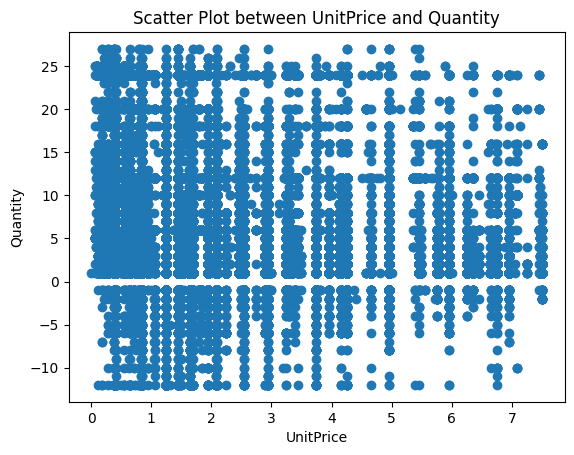

In [127]:
plt.scatter(dataset3['UnitPrice'], dataset3['Quantity'])
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Scatter Plot between UnitPrice and Quantity')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Distribution of Records by Country')

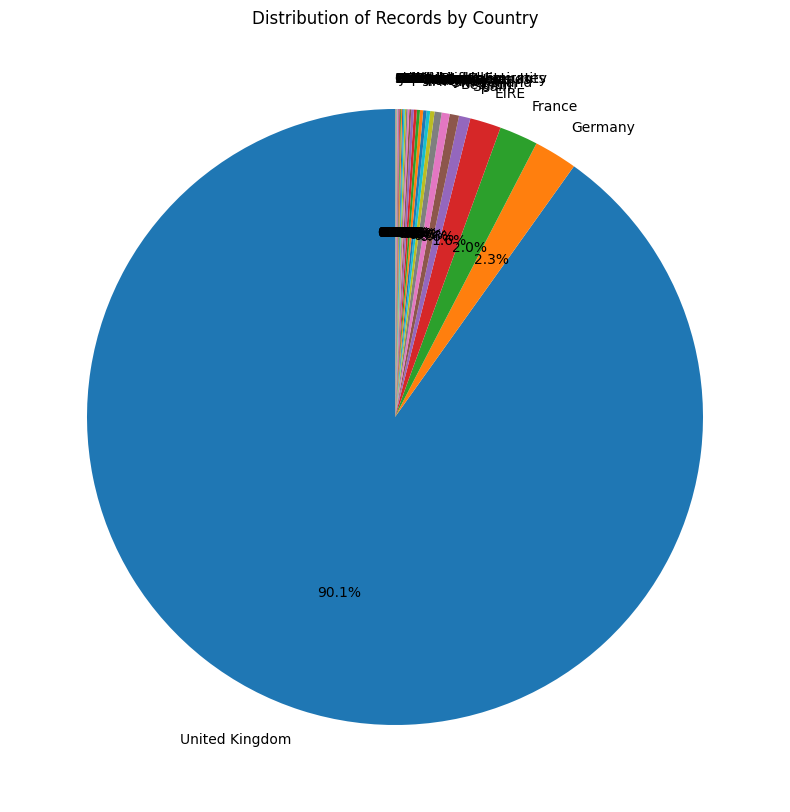

In [141]:
plt.figure(figsize=(10,10))
country_counts = dataset3['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Records by Country')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-143-2607b2167492>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset3.resample('M').sum()['Quantity'].plot()


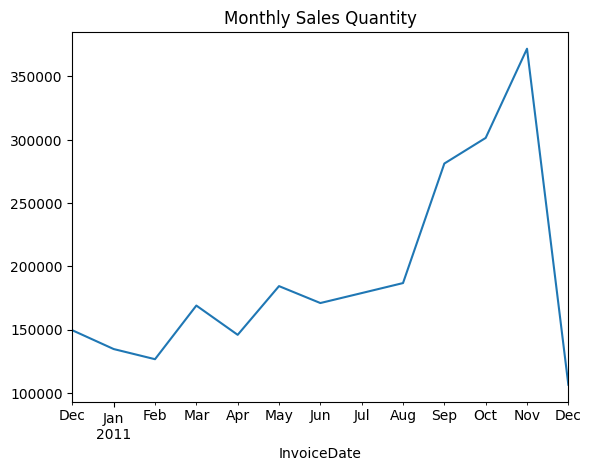

In [143]:
#Time Series Analysis
dataset3.set_index('InvoiceDate', inplace=True)
dataset3.resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Quantity')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-144-a80f5a7164dd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_2_1.resample('M').sum()['Quantity'].plot()


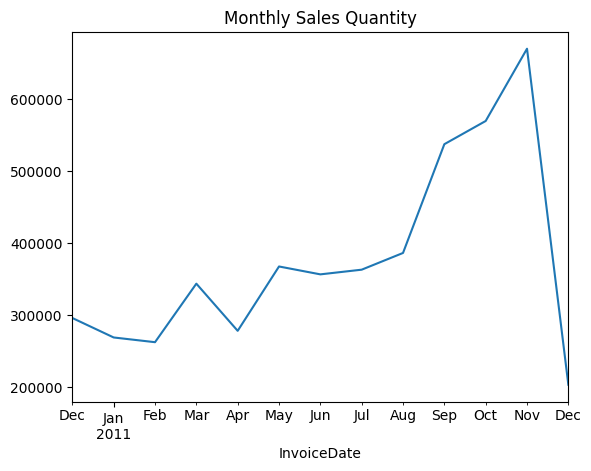

In [144]:
#Time Series Analysis
dataset_2_1.set_index('InvoiceDate', inplace=True)
dataset_2_1.resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Quantity')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


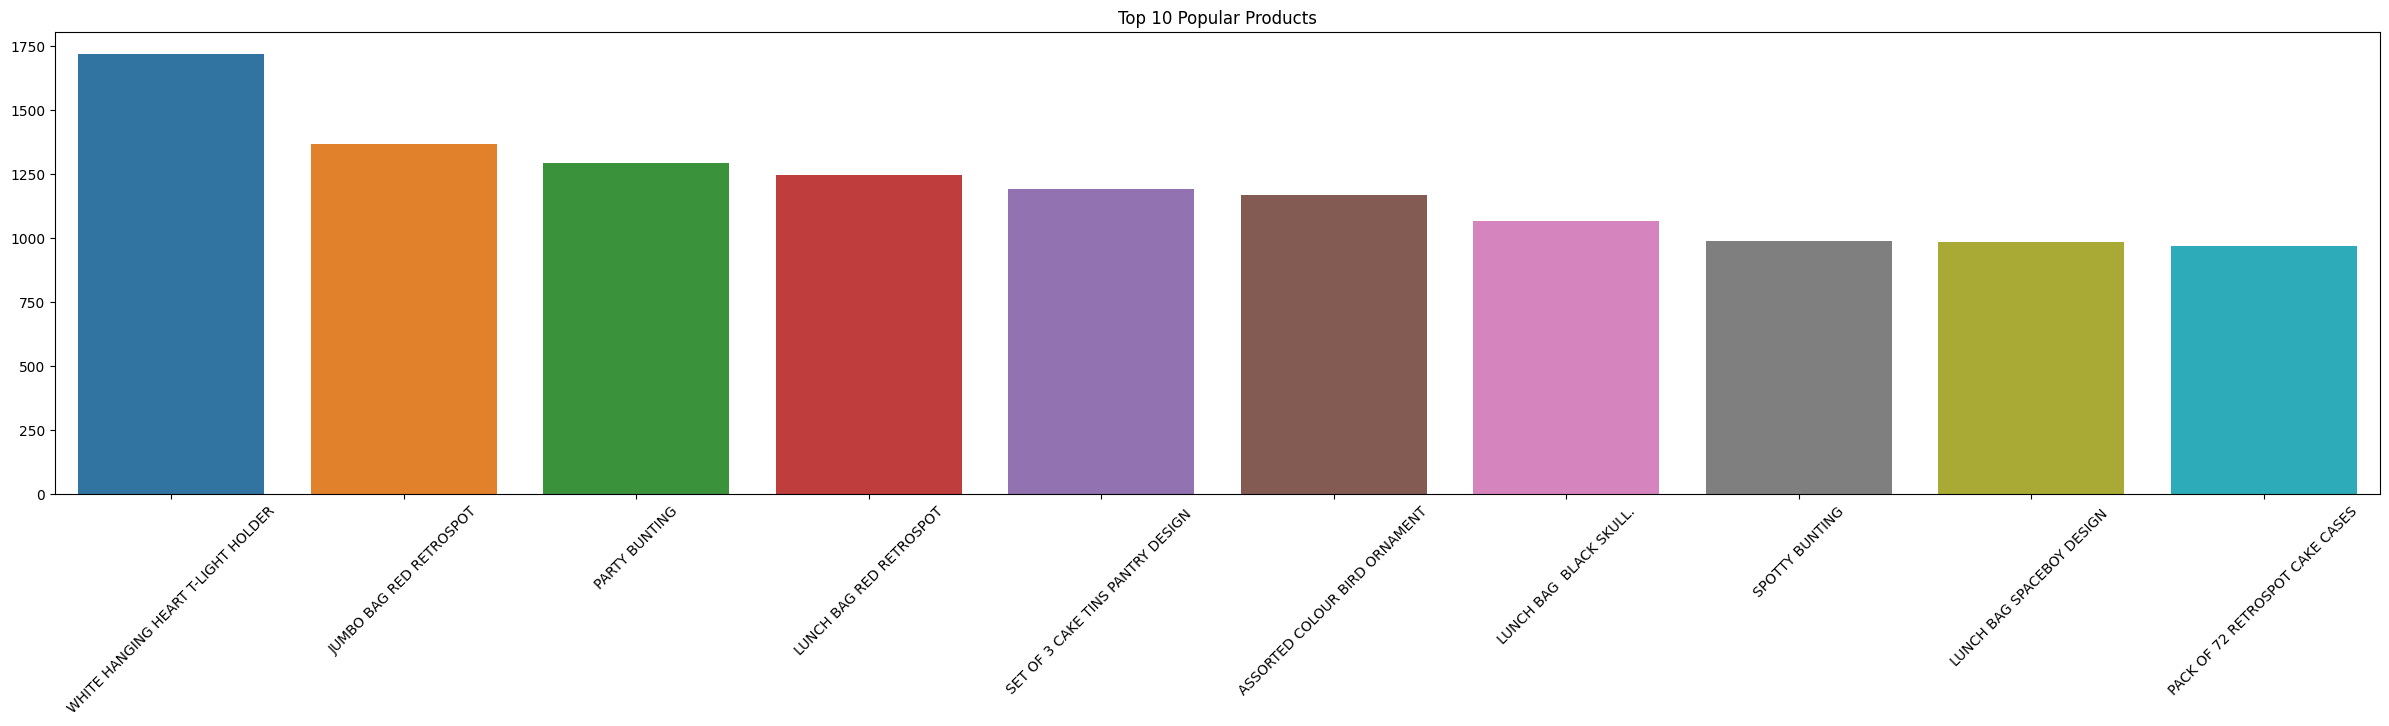

In [159]:
plt.figure(figsize=(30,6))
popular_products = dataset3['Description'].value_counts().head(10)
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.title('Top 10 Popular Products')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


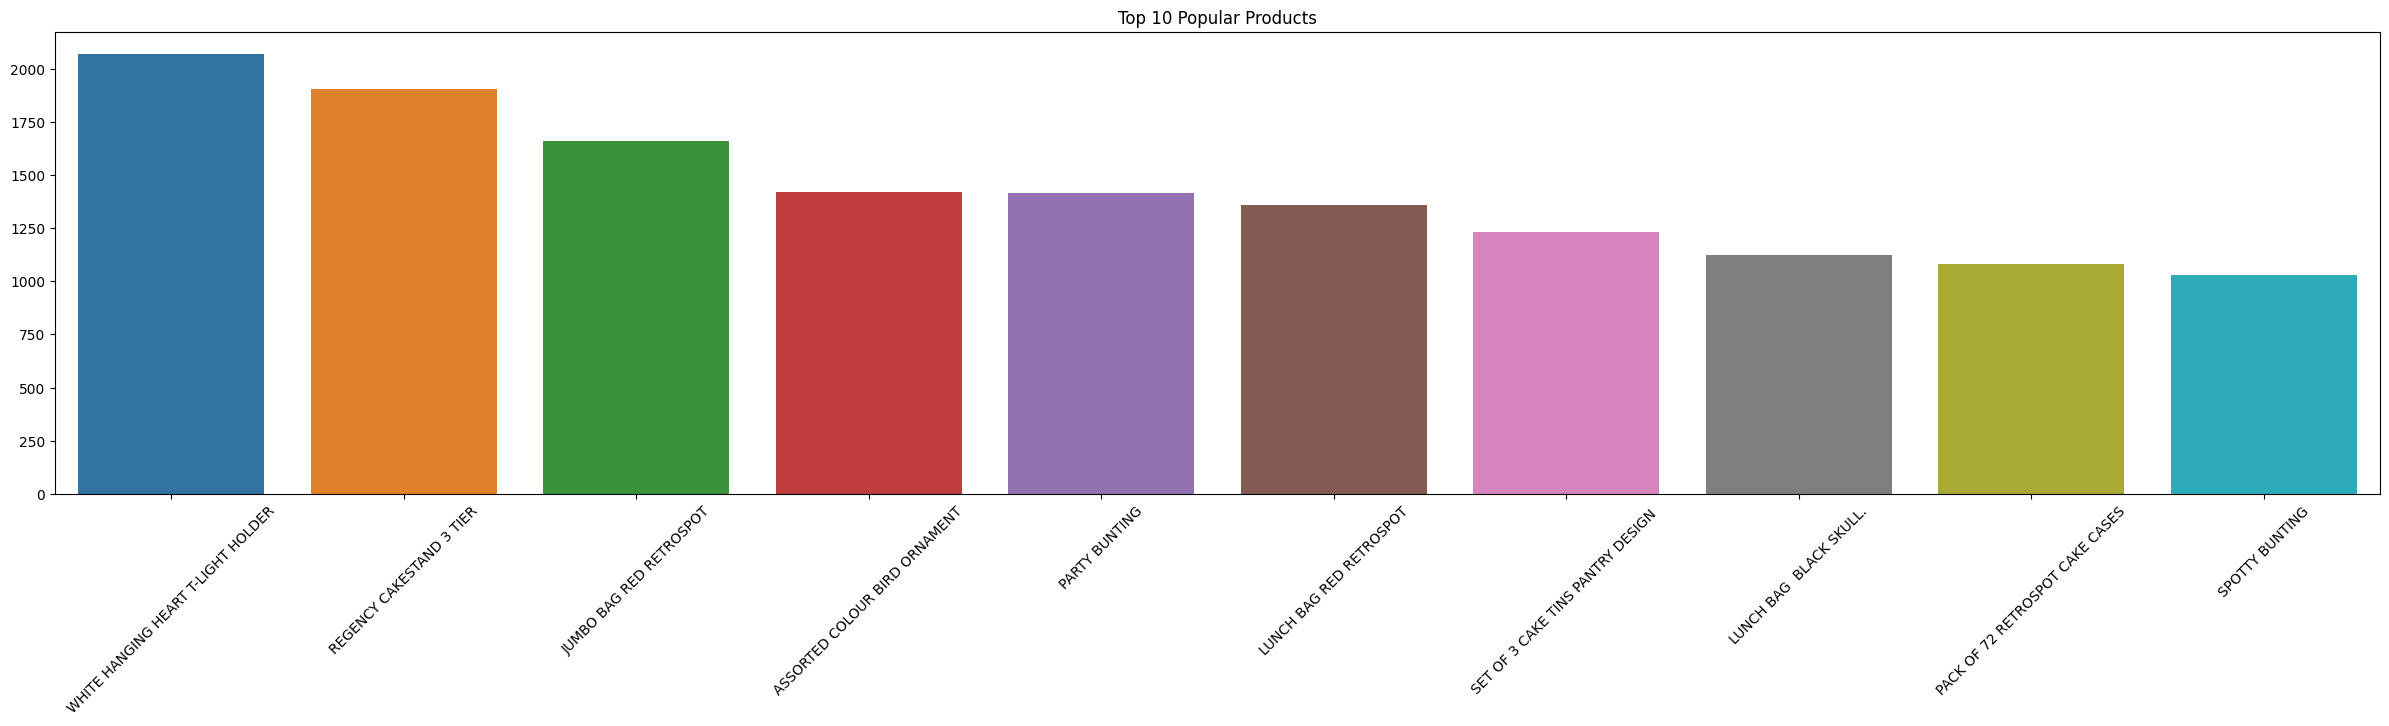

In [161]:
plt.figure(figsize=(30,6))
popular_products = dataset4['Description'].value_counts().head(10)
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.title('Top 10 Popular Products')
plt.xticks(rotation=45)
plt.show()

There is a difference in results of dataset3 and dataset4. But dataset4 is more specific for product Analysis as it contain all transactions hence will accurately tell the trending products